# Функція Лагера

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

## Обчислення функції Лагера з заданими β = 2, σ = 4

In [24]:
#task1
def lager(t, n, beta=2, sigma=4):
    if beta>sigma or beta<0:
        raise ValueError("Bad beta and sigma")
    
    l0 = np.sqrt(sigma) * (np.exp(-beta * t / 2))
    l1 = np.sqrt(sigma) * (1 - sigma * t) * (np.exp(-beta * t / 2))
    if n==0:
        return l0
    if n==1:
        return l1
    if n>=2:
        ln=(2 * 2 - 1 - t * sigma) / 2 * l1 - (2 - 1) / 2 * l0
        for j in range(3, n+1):
            l0 = l1
            l1 = ln
            ln = (2 * j - 1 - t * sigma) / j * l1 - (j - 1) / j * l0
        return ln    

In [25]:
widgets.interact(lager, t=widgets.IntSlider(description="T:",min=1, max=20, value=1), n=widgets.IntSlider(description="N:", min=1, max=20, value=1),)

interactive(children=(IntSlider(value=1, description='T:', max=20, min=1), IntSlider(value=1, description='N:'…

<function __main__.lager(t, n, beta=2, sigma=4)>

In [4]:
print(lager(1,3))    

1.7167707254667308


##  Табулювання функції Лагера

In [5]:
#task 2
def tabulate_lager(T,n,beta=2, sigma=4):
    steps=np.linspace(0,T,100)
    results = lager(steps, n, beta, sigma)
    df = pd.DataFrame({'t': steps, 'l': results})
    return df.round(5)

In [6]:
tabulate_lager(10, 2)

,t,l
0,0.00000,2.00000
1,0.10101,0.49453
2,0.20202,-0.47336
3,0.30303,-1.01868
4,0.40404,-1.23687
...,...,...
95,9.59596,0.08989
96,9.69697,0.08307
97,9.79798,0.07675
98,9.89899,0.07089


##  Обчислювальний експеримент

In [7]:
#task 3
def experiment(T, beta=2, sigma=4, epsilon=0.001, N=20):
    t = np.linspace(0, T, 1000)
    n = range(1, N+1)
    res=None
    for i in t:
        is_good=True
        for j in n:
            if abs(lager(i,j,beta,sigma))>epsilon:
                is_good=False
                break
        if is_good and res is None:
            res = i
            break  
    return res, pd.DataFrame(
        data={
            'n': n,
            'L_n': [lager(res,i, beta, sigma) for i in n]})
            

In [8]:
res, df=experiment(100)
df

,n,L_n
0,1,-2.858701e-32
1,2,4.478343e-30
2,3,-4.647081e-28
3,4,3.593209e-26
4,5,-2.208132e-24
5,6,1.123332e-22
6,7,-4.865604e-21
7,8,1.831625e-19
8,9,-6.087176e-18
9,10,1.808168e-16


In [9]:
res

79.07907907907908

##  Обчислення інтегралів

In [10]:
#task 4
def quad(f,a,b,n=10000):
    x = np.linspace(a, b, n)
    s=sum([f(i) for i in x])
    return s*abs(b-a)/n

def lager_transformation(f,n,beta=2,sigma=4):
    def integrand(t):
        alpha = sigma - beta
        return f(t)*lager(t, n, beta, sigma)*np.exp(-t*(alpha))
    b=experiment(100,beta,sigma)[0]
    return quad(integrand, 0, b)

##  Перетворення Лагера

In [11]:
#task 5
def f(t):
    if 0 <= t <= 2 * np.pi:
        return np.sin(t - np.pi / 2) + 1
    elif t > 2 * np.pi:
        return 0
def lag_transform_tab(f, N, beta=2, sigma=4):
    t = range(0, N+1)
    results= [lager_transformation(f, n, beta, sigma) for n in t]
    return results

In [12]:
lag_transform_tab(f, 20)

[0.06665999946809152,
 -0.1822039881310192,
 0.17805610913078898,
 -0.07428266950003064,
 0.007262784325811685,
 0.007587430478937871,
 -0.0030964949450654716,
 -0.0006148703444646452,
 0.0007994250066752804,
 -2.585015381200521e-05,
 -0.00023592602139503555,
 5.25696009550527e-05,
 9.381390277833157e-05,
 -3.067668357428691e-05,
 -5.265835095609882e-05,
 1.097528013687396e-05,
 3.6161726975307814e-05,
 4.547654883237792e-06,
 -2.3361494137767873e-05,
 -1.4823620942373442e-05,
 8.910978104648701e-06]

##  Обернене перетвореня Лагера

In [13]:
#task 6
def reverse_lager_transform(h,t,beta=2,sigma=4):
    return sum([h[k] * lager(t,k) for k in range(len(h))])


In [14]:
h=lag_transform_tab(f, 20,2,4)
reverse_lager_transform(h,2,2,4)

1.4159846887860223

##  Графік функції Лагера

In [15]:
#task 7
def plot_lager(t, n, beta=2, sigma=4):
    plt.figure(figsize=(10, 10))
    for i in range(n + 1):
        lager_results = tabulate_lager(t, i)
        plt.plot(lager_results.index, lager_results["l"], label=f'n={i}')
    plt.show()


In [32]:
#task7
def plot_lagger(T, n, beta=2, sigma=4):
    plt.figure(figsize=(8, 8))
    for i in range(n+1):
        lagger_values = tabulate_lager(T, i, beta, sigma)
        plt.plot(lagger_values['t'], lagger_values['l'], label=f"n={i}")
    
    plt.xlabel("t")
    plt.ylabel("l(t)")
    plt.title("Функції Лагера")
    plt.legend(loc="lower left", ncol=3)
    plt.show()

In [34]:
widgets.interact(plot_lagger, T=widgets.IntSlider(description="T:",min=1, max=20, value=1), n=widgets.IntSlider(description="N:", min=1, max=20, value=1),beta=widgets.fixed(2), sigma=widgets.fixed(4))

interactive(children=(IntSlider(value=1, description='T:', max=20, min=1), IntSlider(value=1, description='N:'…

<function __main__.plot_lagger(T, n, beta=2, sigma=4)>

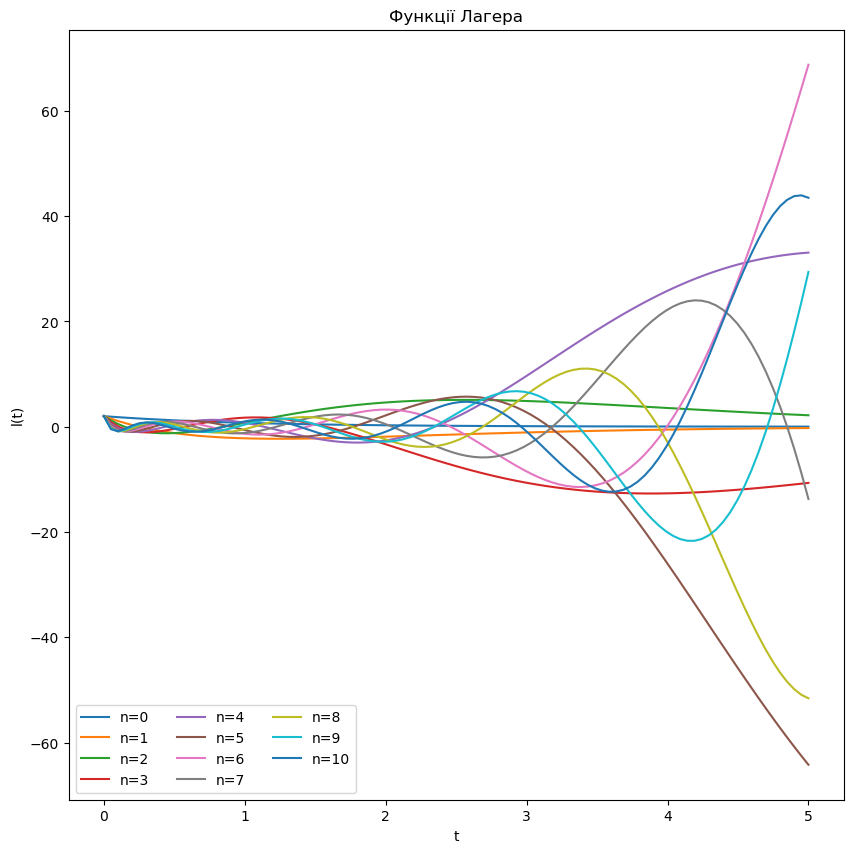

In [18]:
plot_lagger(5,10)

##  Графік оберненого перетворення Лагера

###  Для заданої функції

In [19]:
#task8
def plot_transformations(f, n, beta=2, sigma=4,t1=0, t2=2*np.pi):

    transformed_values = lag_transform_tab(f,n,beta,sigma)
    reversed_trans_vals = [reverse_lager_transform(transformed_values, t, beta, sigma) for t in np.linspace(t1, t2, 1000)]
    correct_vals=[f(t) for t in np.linspace(t1, t2, 1000)]
    fig = plt.figure(figsize=(10, 10))
    ax = fig.subplots(2, 1)
    ax[0].plot(range(n+1), transformed_values)
    ax[0].set_title(f"Lager transformation n={n}")
    ax[0].set_xlabel("n")
    ax[0].set_ylabel("f_n")
    ax[0].set_xticks(range(n+1))
    
    ax[1].plot(np.linspace(t1, t2, 1000), reversed_trans_vals, label="reversed troransformed", color="red")
    ax[1].plot(np.linspace(t1, t2, 1000),correct_vals, label="correct values", linewidth=7.0, color="grey", alpha=0.5)
    ax[1].set_title(f"Reversed transformation tє[{t1},  {t2}]")
    ax[1].set_xlabel("t")
    ax[1].set_ylabel("f(t)")
    ax[1].legend()
    plt.show()


In [29]:
def interactive_plot(func):
    n_slider = widgets.IntSlider(description="N:", min=1, max=20, value=5)
    interact(plot_transformations, f=widgets.fixed(func), n=n_slider, beta=widgets.fixed(2), sigma=widgets.fixed(4))
interactive_plot(f)

interactive(children=(IntSlider(value=5, description='N:', max=20, min=1), IntSlider(value=0, description='t1'…

### Для власної функції

In [30]:
def g(t):
    if t!=0:
        return np.cos(2*t+np.pi)*t
    else:
        return 0

In [31]:
interactive_plot(g)

interactive(children=(IntSlider(value=5, description='N:', max=20, min=1), IntSlider(value=0, description='t1'…